In [1]:
import pandas as pd
import geopandas as gpd
import geosnap as gio
from geosnap import DataStore
from geosnap.io import get_census, get_acs, get_nces, store_acs
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
from shapely import Point
from shapely.geometry import Polygon
import contextily as cx

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
#datasets = DataStore("~/github/15-minute-analysis/15-minute-package/data/acs")

In [3]:
#sd_tracts = get_acs(datasets, county_fips='06073', years=[2021], level='tract')

In [4]:
sd_tracts = gpd.read_parquet("./data/acs_tracts/sd_acs.parquet")

In [5]:
sd_tracts = sd_tracts.to_crs("EPSG:2771")

In [6]:
sd_tracts

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
10522,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,8.660352,1.623816,0.304465,0.000000,1.082544,0.000000,1.116373,0.0,0.0,"MULTIPOLYGON (((1911452.095 565402.475, 191147..."
10523,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,4.374188,6.323084,2.771763,0.000000,4.677350,0.000000,0.909485,0.0,0.0,"MULTIPOLYGON (((1912959.729 565929.036, 191304..."
10524,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,6.000972,4.217016,0.000000,0.123305,3.699137,0.000000,1.331689,0.0,0.0,"MULTIPOLYGON (((1912462.852 564609.268, 191248..."
10525,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,1.866667,17.155556,0.622222,2.444444,16.311111,0.000000,4.888889,0.0,0.0,"MULTIPOLYGON (((1913909.094 564957.747, 191393..."
10526,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,7.462196,7.102672,1.265823,0.000000,4.887482,2.215190,3.059072,0.0,0.0,"MULTIPOLYGON (((1914336.092 564060.212, 191433..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,06073021900,2273.0,0.0,30.0,0.0,50.0,25.0,44.0,12.0,1004.0,...,5.416667,21.531286,0.272056,4.236300,11.465216,0.000000,20.093276,0.0,0.0,"MULTIPOLYGON (((1916764.798 557110.337, 191695..."
11255,06073022000,2015.0,0.0,151.0,0.0,8.0,5.0,10.0,0.0,1833.0,...,7.659858,8.651457,2.552519,0.903546,3.930427,0.542128,4.111136,0.0,0.0,"MULTIPOLYGON (((1921042.903 557678.844, 192106..."
11256,06073022101,54.0,0.0,0.0,19.0,17.0,76.0,41.0,0.0,371.0,...,7.719298,13.815789,0.000000,3.289474,8.245614,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((1898896.043 608949.905, 189890..."
11257,06073022102,2537.0,47.0,0.0,18.0,60.0,157.0,302.0,0.0,2234.0,...,4.365723,8.831234,0.860671,1.783710,3.916677,3.766995,2.981165,0.0,0.0,"MULTIPOLYGON (((1901830.285 606452.810, 190183..."


<Axes: >

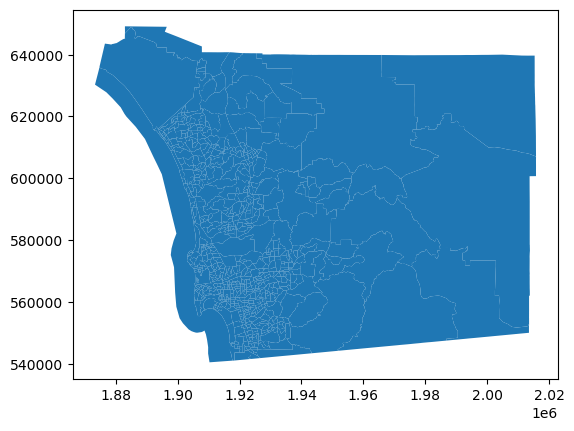

In [7]:
sd_tracts.plot()

In [8]:
sd_boundary = gpd.read_file("./data/sd_boundary/san_diego_boundary_datasd.shx")

<Axes: >

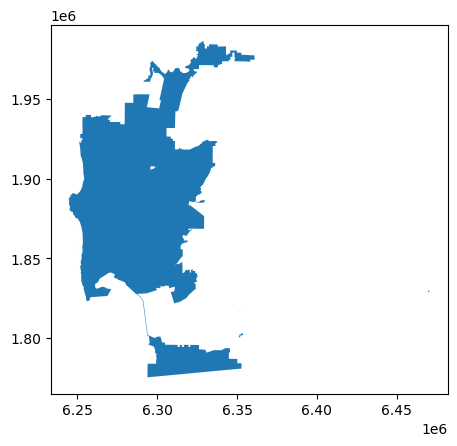

In [9]:
sd_boundary.plot()

In [10]:
sd_boundary.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
sd_tracts.crs

<Projected CRS: EPSG:2771>
Name: NAD83(HARN) / California zone 6
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
sd_boundary = sd_boundary.to_crs(sd_tracts.crs)

In [13]:
sd_overlay = gpd.overlay(sd_boundary, sd_tracts, how='intersection')

<Axes: >

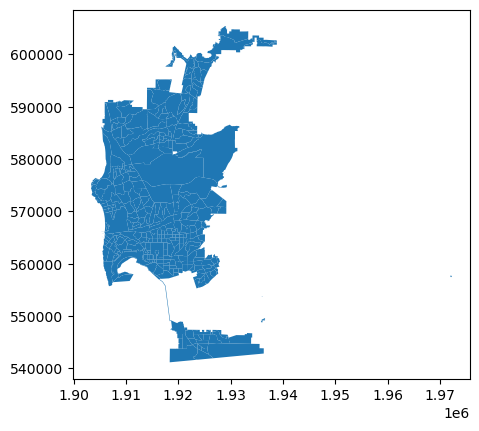

In [14]:
sd_overlay.plot()

In [15]:
variables = ['GEOID', 'n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
             'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 
             'p_asian_persons']

In [16]:
sd_overlay = gpd.GeoDataFrame(sd_overlay[variables], geometry=sd_overlay['geometry'])
sd_overlay

,GEOID,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,06073000100,2956.0,1.623816,160990.0,96996.0,77.604871,0.000000,14.445196,3.958051,"POLYGON ((1911470.501 565427.262, 1911525.812 ..."
1,06073000201,2309.0,6.323084,94629.0,100047.0,82.503248,0.389779,5.326981,5.586834,"POLYGON ((1913044.157 565928.284, 1913129.242 ..."
2,06073000202,4116.0,4.217016,99651.0,66060.0,71.865889,0.485909,17.322643,6.219631,"POLYGON ((1912483.463 564650.119, 1912490.333 ..."
3,06073000301,2250.0,17.155556,82788.0,74564.0,65.111111,2.311111,19.288889,5.377778,"POLYGON ((1913931.680 564957.659, 1913999.347 ..."
4,06073000302,3042.0,7.102672,71712.0,66441.0,73.668639,1.873767,21.071663,2.629849,"POLYGON ((1914337.054 564105.785, 1914337.282 ..."
...,...,...,...,...,...,...,...,...,...,...
387,06073021101,5535.0,24.136585,73182.0,28891.0,59.421861,1.680217,35.483288,0.180668,"POLYGON ((1972104.595 557419.314, 1971940.102 ..."
388,06073013425,1895.0,3.641161,162632.0,59177.0,26.279683,8.284960,46.754617,13.614776,"POLYGON ((1935966.251 553700.199, 1935954.367 ..."
389,06073021304,3204.0,1.248439,147734.0,53376.0,73.938826,0.312110,24.126092,1.622971,"POLYGON ((1936049.303 553790.707, 1936066.838 ..."
390,06073013320,7047.0,0.584046,131194.0,36988.0,16.460905,15.283099,37.278274,24.521073,"POLYGON ((1936015.984 548837.705, 1936014.870 ..."


In [17]:
max_pop = sd_overlay['n_total_pop'].max()

In [18]:
max_tract = sd_overlay[sd_overlay['n_total_pop'] == max_pop]
max_tract

,GEOID,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
310,06073013317,14978.0,8.218899,126759.0,37008.0,11.703832,5.661637,47.442916,30.718387,"POLYGON ((1926222.814 547357.720, 1926227.263 ..."


<Axes: >

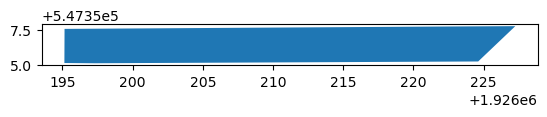

In [19]:
max_tract.plot()

In [20]:
max_tract.explore()

In [21]:
find_tract = sd_tracts[sd_tracts['GEOID'] == '06073013317']
find_tract

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
10867,06073013317,6314.0,0.0,381.0,62.0,22.0,29.0,39.0,0.0,4391.0,...,7.177193,8.218899,1.597553,0.99932,4.180829,0.0,6.934058,0.0,0.0,"MULTIPOLYGON (((1926197.103 547765.558, 192620..."


<Axes: >

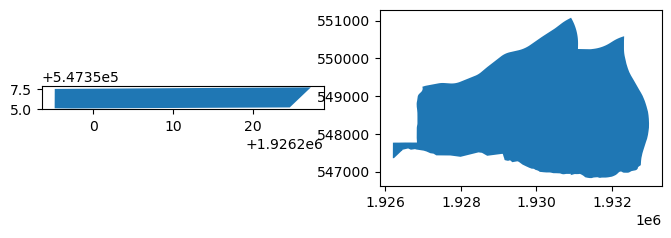

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

max_tract.plot(ax=ax[0])
find_tract.plot(ax=ax[1])

In [23]:
find_tract.explore()

In [24]:
sd_join = gpd.sjoin(sd_tracts, sd_boundary, how='inner', predicate='within')
sd_join

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,index_right,objectid,code
10522,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,0.000000,1.082544,0.000000,1.116373,0.000000,0.0,"MULTIPOLYGON (((1911452.095 565402.475, 191147...",0,56,0
10523,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,0.000000,4.677350,0.000000,0.909485,0.000000,0.0,"MULTIPOLYGON (((1912959.729 565929.036, 191304...",0,56,0
10524,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,0.123305,3.699137,0.000000,1.331689,0.000000,0.0,"MULTIPOLYGON (((1912462.852 564609.268, 191248...",0,56,0
10525,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,2.444444,16.311111,0.000000,4.888889,0.000000,0.0,"MULTIPOLYGON (((1913909.094 564957.747, 191393...",0,56,0
10526,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,0.000000,4.887482,2.215190,3.059072,0.000000,0.0,"MULTIPOLYGON (((1914336.092 564060.212, 191433...",0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,06073017068,551.0,0.0,0.0,0.0,16.0,0.0,14.0,0.0,1523.0,...,0.408998,1.104294,0.429448,0.000000,0.000000,0.0,"MULTIPOLYGON (((1919427.243 585742.533, 191945...",0,56,0
11036,06073017069,196.0,0.0,0.0,65.0,0.0,20.0,21.0,0.0,549.0,...,0.000000,1.127349,0.000000,0.000000,0.000000,0.0,"MULTIPOLYGON (((1921321.758 593312.719, 192132...",0,56,0
11248,06073021401,717.0,9.0,28.0,0.0,50.0,65.0,65.0,0.0,283.0,...,0.435228,2.406554,0.000000,1.049667,0.000000,0.0,"MULTIPOLYGON (((1908095.362 563712.995, 190811...",0,56,0
11249,06073021402,761.0,0.0,0.0,0.0,11.0,33.0,87.0,11.0,979.0,...,0.000000,9.753445,0.000000,1.486584,0.507614,0.0,"MULTIPOLYGON (((1907696.949 562189.912, 190771...",0,56,0


In [25]:
sd_join = gpd.GeoDataFrame(sd_join[variables], geometry=sd_join['geometry'])

In [26]:
type(sd_join)

geopandas.geodataframe.GeoDataFrame

In [27]:
sd_city = gpd.read_file("./data/cities/san-diego/csd.geojson")

<Axes: >

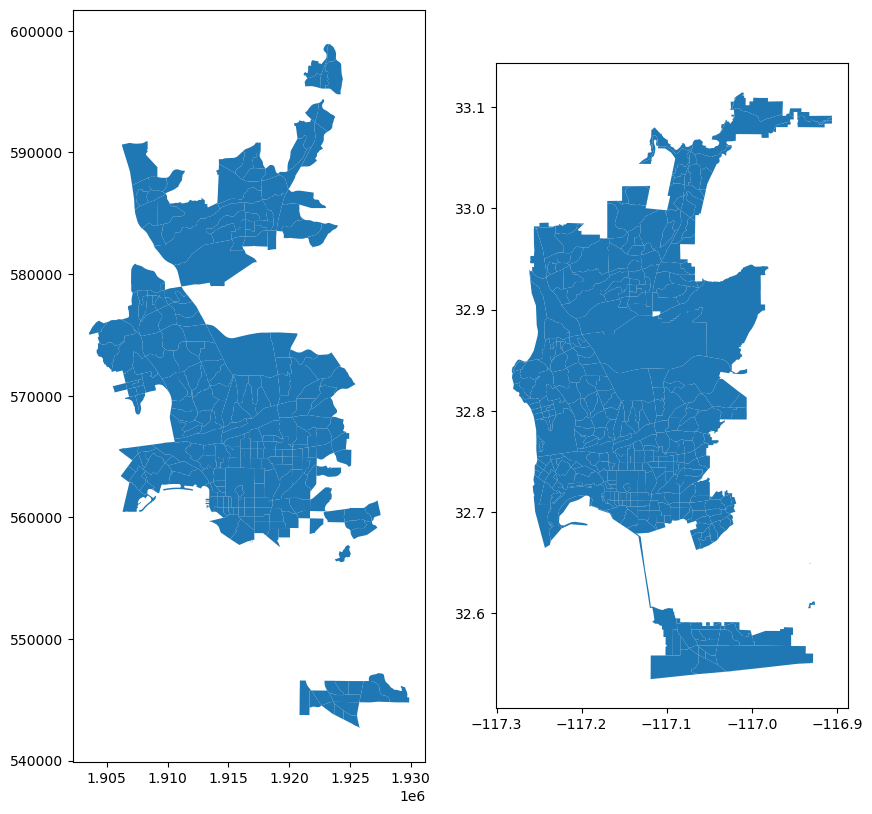

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

sd_join.plot(ax=ax[0])
sd_city.plot(ax=ax[1])

In [29]:
sd_city['n_total_pop'].sum() - sd_join['n_total_pop'].sum()

621880.0

In [30]:
sd_join['weight_pop'] = sd_join['n_total_pop'] / sd_join['n_total_pop'].sum()
sd_join['weight_pop']

10522    0.002820
10523    0.002203
10524    0.003927
10525    0.002146
10526    0.002902
           ...   
11035    0.004665
11036    0.002285
11248    0.004093
11249    0.002658
11250    0.003638
Name: weight_pop, Length: 252, dtype: float64

In [31]:
sd_join['centroids'] = sd_join.centroid
sd_join['centroids']

10522    POINT (1912297.979 565417.608)
10523    POINT (1913470.538 565520.003)
10524    POINT (1913295.600 564566.876)
10525    POINT (1914209.796 564554.116)
10526    POINT (1914733.385 564435.269)
                      ...              
11035    POINT (1921071.723 586141.828)
11036    POINT (1921957.483 593340.969)
11248    POINT (1909331.456 563245.729)
11249    POINT (1908237.504 562579.235)
11250    POINT (1910527.926 587695.609)
Name: centroids, Length: 252, dtype: geometry

In [32]:
sd_join['xc'] = sd_join['centroids'].x
sd_join['xc']

10522    1.912298e+06
10523    1.913471e+06
10524    1.913296e+06
10525    1.914210e+06
10526    1.914733e+06
             ...     
11035    1.921072e+06
11036    1.921957e+06
11248    1.909331e+06
11249    1.908238e+06
11250    1.910528e+06
Name: xc, Length: 252, dtype: float64

In [33]:
sd_join['yc'] = sd_join['centroids'].y
sd_join['yc']

10522    565417.607955
10523    565520.003084
10524    564566.875553
10525    564554.115915
10526    564435.269259
             ...      
11035    586141.828315
11036    593340.969273
11248    563245.728851
11249    562579.235415
11250    587695.609418
Name: yc, Length: 252, dtype: float64

In [34]:
weight_x = (sd_join['xc'] * sd_join['weight_pop']).sum() 

In [35]:
weight_y = (sd_join['yc'] * sd_join['weight_pop']).sum() 

In [36]:
print(weight_x)
print(weight_y)

1916582.4042244346
569555.6349569801


In [37]:
weight_point = Point(weight_x, weight_y)

In [38]:
weight_geo = gpd.GeoSeries(weight_point, crs=2771)

In [39]:
weight_geo.explore()

<Axes: >

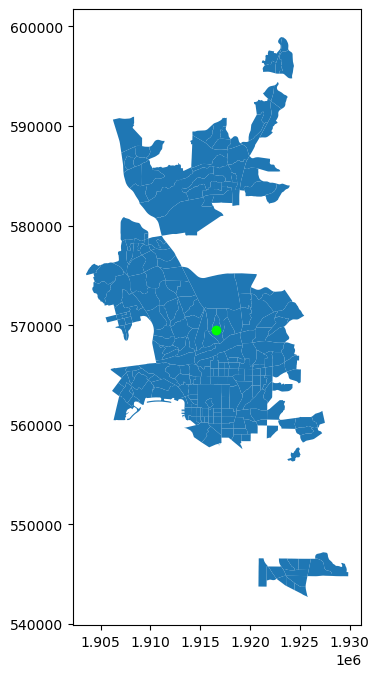

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

sd_join.plot(ax=ax)
weight_geo.plot(ax=ax, color='lime')

In [41]:
sd_city.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [42]:
sd_city = sd_city.to_crs(2771)

In [43]:
sd_city

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2956.0,1.623816,160990.0,96996.0,77.604871,0.000000,14.445196,3.958051,"POLYGON ((1911470.501 565427.262, 1911525.812 ..."
1,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2309.0,6.323084,94629.0,100047.0,82.503248,0.389779,5.326981,5.586834,"POLYGON ((1913044.157 565928.284, 1913129.242 ..."
2,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,4116.0,4.217016,99651.0,66060.0,71.865889,0.485909,17.322643,6.219631,"POLYGON ((1912483.463 564650.119, 1912490.333 ..."
3,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2250.0,17.155556,82788.0,74564.0,65.111111,2.311111,19.288889,5.377778,"POLYGON ((1913931.680 564957.659, 1913999.347 ..."
4,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,3042.0,7.102672,71712.0,66441.0,73.668639,1.873767,21.071663,2.629849,"POLYGON ((1914337.054 564105.785, 1914337.282 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,3813.0,1.993181,250001.0,93803.0,50.904799,0.000000,5.979544,35.300288,"POLYGON ((1909600.724 586811.090, 1909615.395 ..."
386,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,8945.0,12.073784,155090.0,66638.0,45.656792,0.581330,9.122415,34.231414,"POLYGON ((1913535.492 589506.332, 1913589.496 ..."
387,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,2879.0,11.439651,97287.0,41758.0,55.296978,4.376520,32.268149,3.265023,"MULTIPOLYGON (((1917280.276 556064.188, 191761..."
388,06,66000,02411782,1600000US0666000,0666000,San Diego,San Diego city,CA,California,25,...,120532755.0,3600.0,21.531286,46297.0,22175.0,14.944444,5.777778,68.333333,9.361111,"MULTIPOLYGON (((1919381.779 557563.860, 191928..."


In [44]:
sd_city['weight_pop'] = sd_city['n_total_pop'] / sd_city['n_total_pop'].sum()

In [45]:
sd_city['centroid'] = sd_city.centroid

In [46]:
#sd_tracts['centroid'].dropna()

In [47]:
#sd_tracts['weight_pop'].dropna()

In [48]:
#sd_tracts

In [49]:
#from pysal.lib import weights
#sd_queen = weights.contiguity.Queen.from_dataframe(sd_tracts, use_index=False)

In [50]:
#sd_queen.islands

In [51]:
#sd_tracts['component'] = sd_queen.component_labels

In [52]:
#sd_tracts.component.value_counts()

In [53]:
#sd_tracts = sd_tracts.loc[sd_tracts['component'] == 0]

In [54]:
#sd_city[['xc', 'yc']].mean()

In [55]:
#sd_centroid_x = sd_city['xc'].mean()
#sd_centroid_x

In [56]:
#sd_centroid_y = sd_city['yc'].mean()
#sd_centroid_y

In [57]:
#sd_centroid_point = Point(sd_centroid_x, sd_centroid_y)

In [58]:
#sd_geo = gpd.GeoSeries(sd_centroid_point, crs=2771)

In [59]:
#fig, ax = plt.subplots(figsize=(8, 8))

#sd_city.plot(ax=ax)
#sd_geo.plot(ax=ax, color="#FF0000")

In [60]:
sd_city['xc'] = sd_city['centroid'].x
sd_city['yc'] = sd_city['centroid'].y

In [61]:
city_x = (sd_city['xc'] * sd_city['weight_pop']).sum()
city_y = (sd_city['yc'] * sd_city['weight_pop']).sum() 

In [62]:
city_point = Point(city_x, city_y)

In [63]:
city_geo = gpd.GeoSeries(weight_point, crs=2771)

<Axes: >

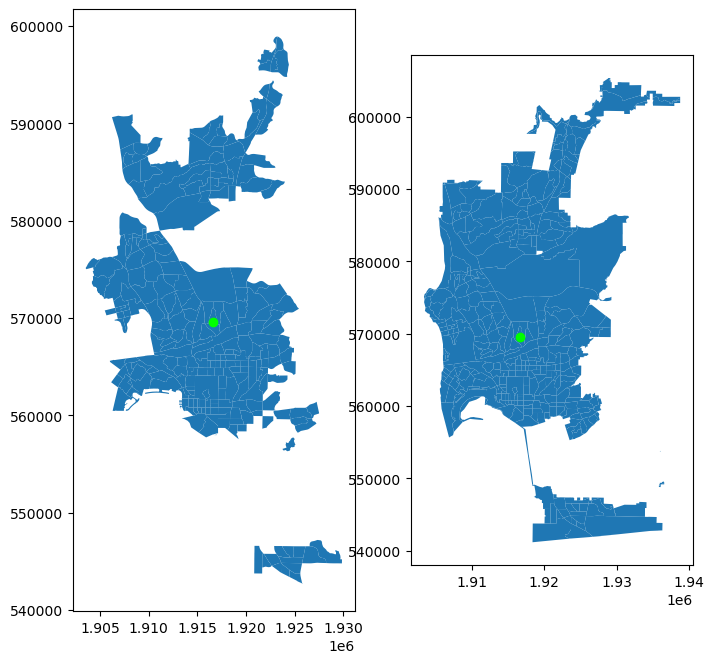

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

sd_join.plot(ax=ax[0])
weight_geo.plot(ax=ax[0], color='lime')
sd_city.plot(ax=ax[1])
city_geo.plot(ax=ax[1], color='lime')

In [65]:
dc_tracts = gpd.read_parquet("./data/acs_tracts/dc_acs.parquet")
dc_tracts

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
15923,11001000101,102.0,0.0,0.0,0.0,68.0,26.0,59.0,0.0,149.0,...,6.245121,2.341920,0.000000,0.000000,2.341920,0.000000,2.341920,0.0,0.0,"MULTIPOLYGON (((-77.05714 38.91054, -77.05702 ..."
15924,11001000102,134.0,0.0,0.0,68.0,56.0,14.0,146.0,0.0,746.0,...,6.073753,6.724512,1.487450,1.456461,4.834211,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.06927 38.90058, -77.06871 ..."
15925,11001000201,152.0,0.0,109.0,5.0,45.0,8.0,98.0,0.0,731.0,...,0.177755,19.402985,0.000000,0.000000,16.417910,2.985075,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.07927 38.91268, -77.07902 ..."
15926,11001000202,42.0,46.0,58.0,61.0,91.0,56.0,220.0,0.0,793.0,...,3.525424,12.948793,2.472042,0.000000,10.829900,0.588582,0.824014,0.0,0.0,"MULTIPOLYGON (((-77.07991 38.90507, -77.07989 ..."
15927,11001000300,150.0,103.0,8.0,33.0,220.0,74.0,71.0,0.0,1308.0,...,0.838082,13.308750,0.301710,0.201140,12.504190,0.000000,0.620181,0.0,0.0,"MULTIPOLYGON (((-77.08262 38.92120, -77.08256 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16124,11001010900,30.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,178.0,...,0.577876,28.233352,3.082003,3.219593,1.403412,26.417171,0.247661,0.0,0.0,"MULTIPOLYGON (((-77.03919 38.80050, -77.03913 ..."
16125,11001011001,0.0,9.0,51.0,0.0,0.0,13.0,19.0,0.0,126.0,...,5.031447,2.683438,0.922432,0.000000,0.000000,0.922432,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.01757 38.87646, -77.01675 ..."
16126,11001011002,12.0,0.0,3.0,18.0,15.0,101.0,62.0,0.0,199.0,...,9.414088,6.126617,3.335602,0.000000,6.126617,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.02188 38.87650, -77.02149 ..."
16127,11001011100,427.0,0.0,45.0,0.0,1.0,19.0,48.0,0.0,557.0,...,3.466872,17.596308,1.645265,0.000000,0.521669,17.074639,0.100321,0.0,0.0,"MULTIPOLYGON (((-76.97913 38.92771, -76.97881 ..."


In [66]:
dc_max = dc_tracts['n_total_pop'].max()
dc_max

7138.0

In [67]:
dc_max_tract = dc_tracts.loc[dc_tracts['n_total_pop'] == dc_max]
dc_max_tract

,GEOID,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_veterans,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry
16051,11001007703,0.0,18.0,144.0,0.0,0.0,0.0,0.0,0.0,336.0,...,1.400953,32.541133,2.756293,4.106314,0.0,31.54268,0.0,0.0,0.0,"MULTIPOLYGON (((-76.95737 38.88381, -76.95724 ..."


In [68]:
dc_max_tract.explore()

<Axes: >

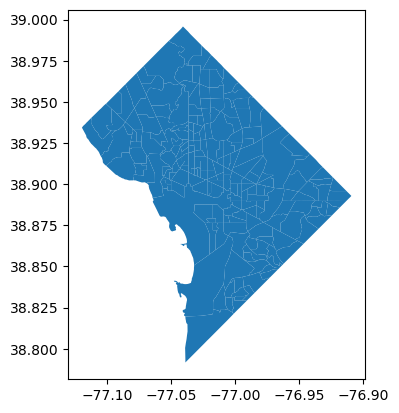

In [69]:
dc_tracts.plot()

In [70]:
dc_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [71]:
dc_tracts = dc_tracts.to_crs(2804)

In [72]:
dc_tracts['pop_weight'] = dc_tracts['n_total_pop'] / dc_tracts['n_total_pop'].sum()
dc_tracts['pop_weight']

15923    0.001875
15924    0.004724
15925    0.005764
15926    0.006477
15927    0.008733
           ...   
16124    0.005319
16125    0.003491
16126    0.002224
16127    0.007600
16128    0.000025
Name: pop_weight, Length: 206, dtype: float64

In [73]:
dc_tracts['centroid'] = dc_tracts.centroid

In [74]:
dc_tracts['xc'] = dc_tracts['centroid'].x

In [75]:
dc_tracts['yc'] = dc_tracts['centroid'].y

In [76]:
dc_weight_x = (dc_tracts['xc'] * dc_tracts['pop_weight']).sum()
dc_weight_x

398885.8641638785

In [77]:
dc_weight_y = (dc_tracts['yc'] * dc_tracts['pop_weight']).sum()
dc_weight_y

137971.35025539913

In [78]:
dc_weight_point = Point(dc_weight_x, dc_weight_y)

In [79]:
dc_geo = gpd.GeoSeries(dc_weight_point, crs=2804)

<Axes: >

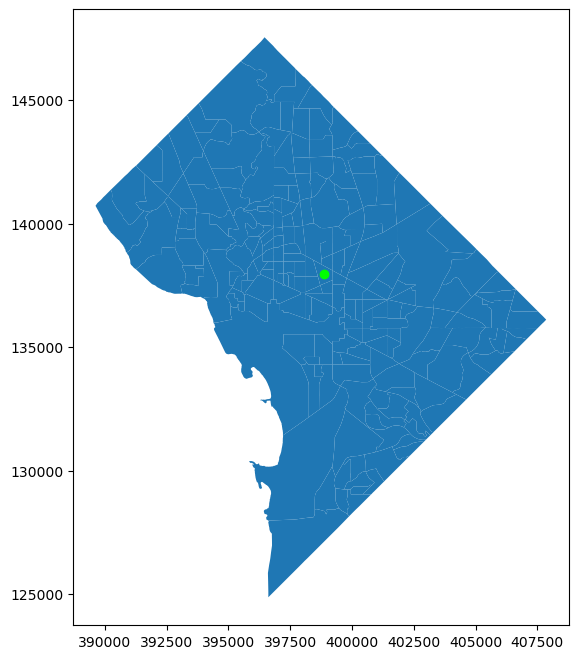

In [80]:
fig, ax = plt.subplots(figsize=(8,8))

dc_tracts.plot(ax=ax)
dc_geo.plot(ax=ax, color='lime')

In [81]:
#pip install osmnet

In [82]:
import os
import pandana as pdna
from geosnap.analyze import isochrones_from_gdf, isochrones_from_id
from pandana.loaders import osm

In [83]:
#sd_network = osm.pdna_network_from_bbox(32.530338, -117.380225, 33.155224, -116.83750, network_type='walk', timeout=360)

In [84]:
#dc_network = osm.pdna_network_from_bbox(38.791631, -77.126641, 38.998276, -76.904168, network_type='walk', timeout=360)

In [85]:
sd_network = pdna.Network.from_hdf5("./networks/sd_network.h5")

Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 323508
Setting CH edge vector of size 506084
Range graph removed 120894 edges of 1012168
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [86]:
dc_network = pdna.Network.from_hdf5("./networks/dc_network.h5")

Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 186256
Setting CH edge vector of size 293422
Range graph removed 39348 edges of 586844
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [87]:
#sd_network.save_hdf5("~/sd_network.h5")

In [88]:
#dc_network.save_hdf5("~/dc_network.h5")

In [89]:
type(sd_network)

pandana.network.Network

In [90]:
weight_geo = weight_geo.to_crs(4326)
dc_geo = dc_geo.to_crs(4326)

In [91]:
sd_nodes = sd_network.get_node_ids(weight_geo.x, weight_geo.y).astype(int)
sd_nodes

0    49149739
Name: node_id, dtype: int64

In [92]:
sd_nodes = sd_nodes[0]
sd_nodes

49149739

In [93]:
isochrones_from_id?

Signature: isochrones_from_id(origin, network, threshold)
Docstring:
Create travel isochrone(s) from a single origin using a pandana network.

Parameters
----------
origin : int or list
    A single or list of node id(s) from a `pandana.Network.nodes_df`
    to serve as isochrone origins
network : pandana.Network
    A pandana network object
threshold : int or list
    A single or list of threshold distances for which isochrones will be
    computed. These are in the
    same units as edges from the pandana.Network.edge_df

Returns
-------
geopandas.GeoDataFrame
    A geodataframe with a single attribute (distance) and a polygon
    geometry representing a travel time isochrone, with a row for each
    threshold distance
File:      /opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py
Type:      function

In [94]:
sd_iso = isochrones_from_id(sd_nodes, network=sd_network, threshold=1600)

/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)


In [95]:
#sd_iso.plot()

In [96]:
sd_city = sd_city.to_crs(4326)

<Axes: >

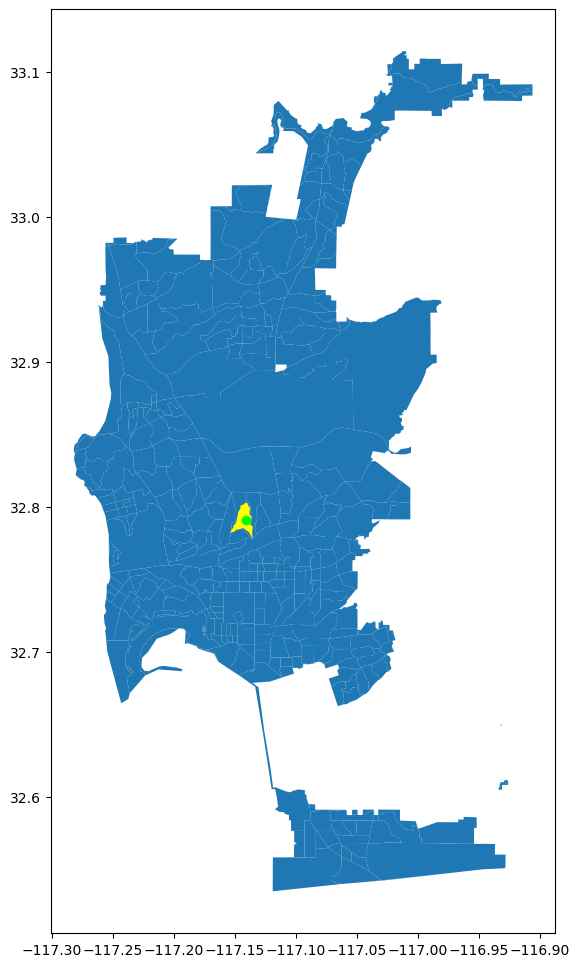

In [97]:
fig, ax = plt.subplots(figsize=(12,12))

sd_city.plot(ax=ax)
sd_iso.plot(ax=ax, color='yellow')
weight_geo.plot(ax=ax, color='lime')

In [98]:
sd_schools = gpd.read_file('./data/schools/spatial-join/sdsJoin.shp')
sd_health = gpd.read_file('./data/health_sd/spatial-joins/healthCare.shp')
sd_stops = gpd.read_file('./data/sd_transit/spatial-joins/busJoin.shp')
sd_grocery= gpd.read_file('./data/sd_grocery/spatial-joins/groceryStores.shp')
sd_parks = gpd.read_file('./data/sd_parks/spatial-joins/parksJoins.shp')
sd_pow = gpd.read_file('./data/sd_worship/spatial-joins/sdPow.geojson')

sd_loc = ['github/15-minute-analysis/15-minute-package/data/schools/spatial-join/sdsJoin.shp',
          'github/15-minute-analysis/15-minute-package/data/health_sd/spatial-joins/healthCare.shp',
          'github/15-minute-analysis/15-minute-package/data/sd_transit/spatial-joins/busJoin.shp',
          'github/15-minute-analysis/15-minute-package/data/sd_grocery/spatial-joins/groceryStores.shp',
          'github/15-minute-analysis/15-minute-package/data/sd_parks/spatial-joins/parksJoins.shp']
          #'github/15-minute-analysis/15-minute-package/data/sd_worship/spatial-joins/sdPow.geojson']

In [99]:
sd_schools = sd_schools.to_crs(4326)
sd_health = sd_health.to_crs(4326)
sd_stops = sd_stops.to_crs(4326)
sd_grocery = sd_grocery.to_crs(4326)
sd_parks = sd_parks.to_crs(4326)
sd_pow = sd_pow.to_crs(4326)

In [100]:
access1 = sd_iso.overlay(sd_schools, how='intersection', keep_geom_type=False)
access1

,distance,NCESSCH,LEAID,SCHOOL_NAM,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,...,AWATER,n_total_po,p_poverty_,median_hou,per_capita,p_nonhisp_,p_nonhis_1,p_hispanic,p_asian_pe,geometry
0,1600,060150313795,0601503,Elevate,06,2285 Murray Ridge Rd.,San Diego,CA,92123,06,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14416 32.78656)
1,1600,063432005489,0634320,Jones Elementary,06,2751 Greyling Dr.,San Diego,CA,92123,06,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14186 32.79571)


In [101]:
access2 = sd_iso.overlay(sd_health, how='intersection', keep_geom_type=False)
access2

,distance,OBJECTID,ID,HOSPITAL_N,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,...,p_poverty_,median_hou,per_capita,p_nonhisp_,p_nonhis_1,p_hispanic,p_asian_pe,facility_n,facility_l,geometry


In [102]:
access3 = sd_iso.overlay(sd_stops, how='intersection', keep_geom_type=False)
access3

,distance,objectid,stop_uid,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_agncy,wheelchair,...,AWATER,n_total_po,p_poverty_,median_hou,per_capita,p_nonhisp_,p_nonhis_1,p_hispanic,p_asian_pe,geometry
0,1600,2985,MTS_11680,11680,11680,Murray Ridge Rd & Al Ct,32.797567,-117.142881,MTS,1,...,120532755.0,5881.0,15.076661,64477.0,32054.0,40.554327,18.143173,23.635436,14.912430,POINT (-117.14287 32.79756)
1,1600,2986,MTS_11678,11678,11678,Murray Ridge Rd & Harjoan Av,32.793940,-117.144631,MTS,1,...,120532755.0,5881.0,15.076661,64477.0,32054.0,40.554327,18.143173,23.635436,14.912430,POINT (-117.14462 32.79393)
2,1600,2990,MTS_10877,10877,10877,Murray Ridge Rd & Mission Center Rd,32.789933,-117.144938,MTS,0,...,120532755.0,5881.0,15.076661,64477.0,32054.0,40.554327,18.143173,23.635436,14.912430,POINT (-117.14493 32.78993)
3,1600,2987,MTS_60743,60743,60743,Murray Ridge Rd & Harjoan Av,32.793334,-117.144423,MTS,1,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14441 32.79333)
4,1600,2989,MTS_12810,12810,12810,Murray Ridge Rd & Macawa Av,32.800786,-117.142032,MTS,1,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14202 32.80078)
5,1600,2991,MTS_12805,12805,12805,Murray Ridge Rd & Mission Center Rd,32.790116,-117.144680,MTS,1,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14467 32.79011)
6,1600,2993,MTS_12808,12808,12808,Murray Ridge Rd & Polland Av,32.797422,-117.142723,MTS,1,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14271 32.79742)


In [103]:
access4 = sd_iso.overlay(sd_grocery, how='intersection', keep_geom_type=False)
access4

,distance,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,...,AWATER,n_total_po,p_poverty_,median_hou,per_capita,p_nonhisp_,p_nonhis_1,p_hispanic,p_asian_pe,geometry


In [104]:
access5 = sd_iso.overlay(sd_parks, how='intersection', keep_geom_type=False)
access5

,distance,objectid,name,alias,gis_acres,park_type,location,owner,source_id,source,...,AWATER,n_total_po,p_poverty_,median_hou,per_capita,p_nonhisp_,p_nonhis_1,p_hispanic,p_asian_pe,geometry
0,1600,637,MURRAY RIDGE NP,Murray Ridge Park,10.69511,Local,"8651 Celestine Avenue, 92123",City of San Diego,None,City of San Diego,...,120532755.0,5881.0,15.076661,64477.0,32054.0,40.554327,18.143173,23.635436,14.91243,"POLYGON ((-117.14817 32.79103, -117.14817 32.7..."


In [105]:
access7 = sd_iso.overlay(sd_pow, how='intersection', keep_geom_type=False)
access7

,distance,OBJECTID,CHURCH NAME,ADDR,CITYNM,TYPE,DESCRIP,FEA_SRC,COMMUNITYNM,SCALE,...,AWATER,n_total_pop,p_poverty_rate,median_household_income,per_capita_income,p_nonhisp_white_persons,p_nonhisp_black_persons,p_hispanic_persons,p_asian_persons,geometry
0,1600,2480,Holy Angels Byzantine Catholic Church,2235 Galahad Rd,San Diego,ReligiousStructure_C,A Building For Public Christian Worship,BUSINESS_SITES; PARCELS_ALL,Serra Mesa,24000.0,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14189 32.78501)
1,1600,15267,International Church of the Foursquare Gospel,2285 Murray Ridge Road,San Diego,ReligiousStructure_C,None,PARCELS_ALL; BUSINESS_SITES,Serra Mesa,NaN,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14447 32.78656)
2,1600,18288,Serra Mesa Christian Fellowship (Serbian Ortho...,2649 Murray Ridge Rd,San Diego,ReligiousStructure_C,None,BUSINESS_SITES; PARCELS_ALL,Serra Mesa,NaN,...,120532755.0,4013.0,4.684774,149132.0,53831.0,52.628956,6.653377,12.758535,23.398953,POINT (-117.14426 32.79318)
3,1600,15233,City View Church (First Assembly of God),8404 Phyllis Place,San Diego,ReligiousStructure_C,None,San Diego Reader; BUSINESS_SITES,Serra Mesa,NaN,...,120532755.0,3435.0,11.295488,100781.0,75205.0,52.721980,2.998544,16.506550,12.780204,POINT (-117.14755 32.78492)


In [106]:
sd_service_gdf = pd.concat([access1, access2, access3, access4, access5, access7], ignore_index=True)
unioned_geometry = sd_service_gdf.unary_union

In [107]:
sd_service_gdf = gpd.GeoDataFrame(geometry=[unioned_geometry])

In [108]:
for num in [access1, access2, access3, access4, access5, access7]:
    sd_service_gdf = pd.concat(
        [sd_service_gdf, num.drop(columns='geometry')], axis=1
    )

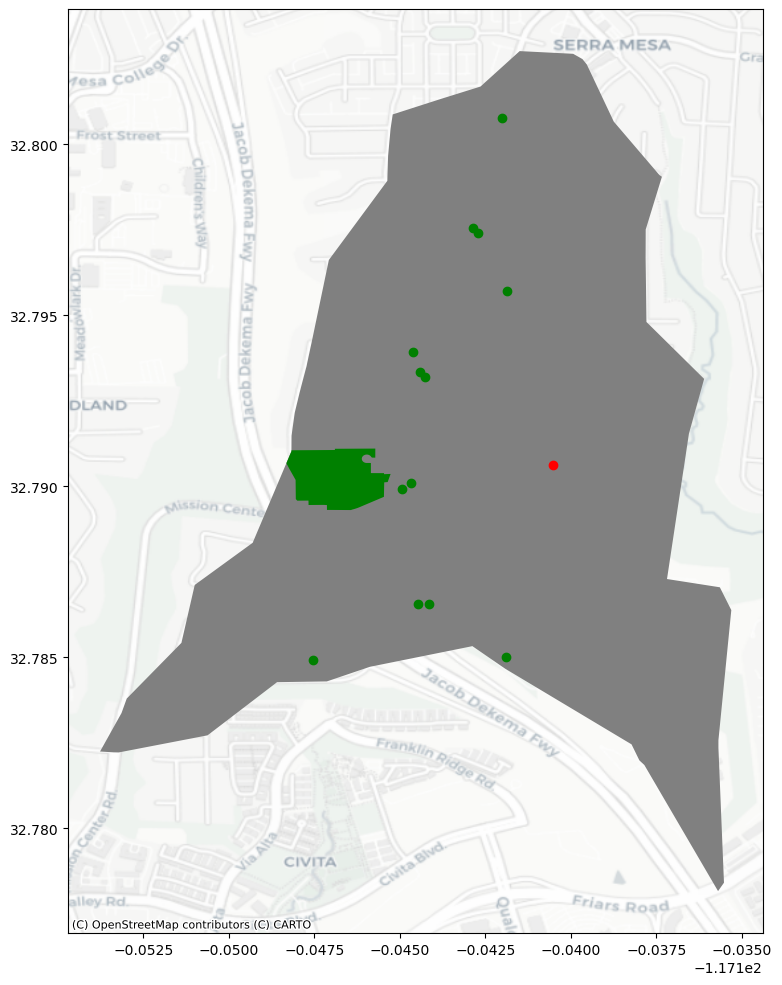

In [109]:
fig, ax = plt.subplots(figsize=(12,12))

sd_iso.plot(ax=ax, color='grey')
sd_service_gdf.plot(ax=ax, color='green')
weight_geo.plot(ax=ax, color='red')
cx.add_basemap(ax=ax, crs=sd_iso.crs.to_string(), source=cx.providers.CartoDB.Positron)

In [110]:
dc_nodes = dc_network.get_node_ids(dc_geo.x, dc_geo.y).astype(int)
dc_nodes

0    4628633703
Name: node_id, dtype: int64

In [111]:
dc_nodes = dc_nodes[0]
dc_nodes

4628633703

In [112]:
dc_iso = isochrones_from_id(dc_nodes, network=dc_network, threshold=1600)

/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)


In [113]:
dc_tracts = dc_tracts.to_crs(4326)

<Axes: >

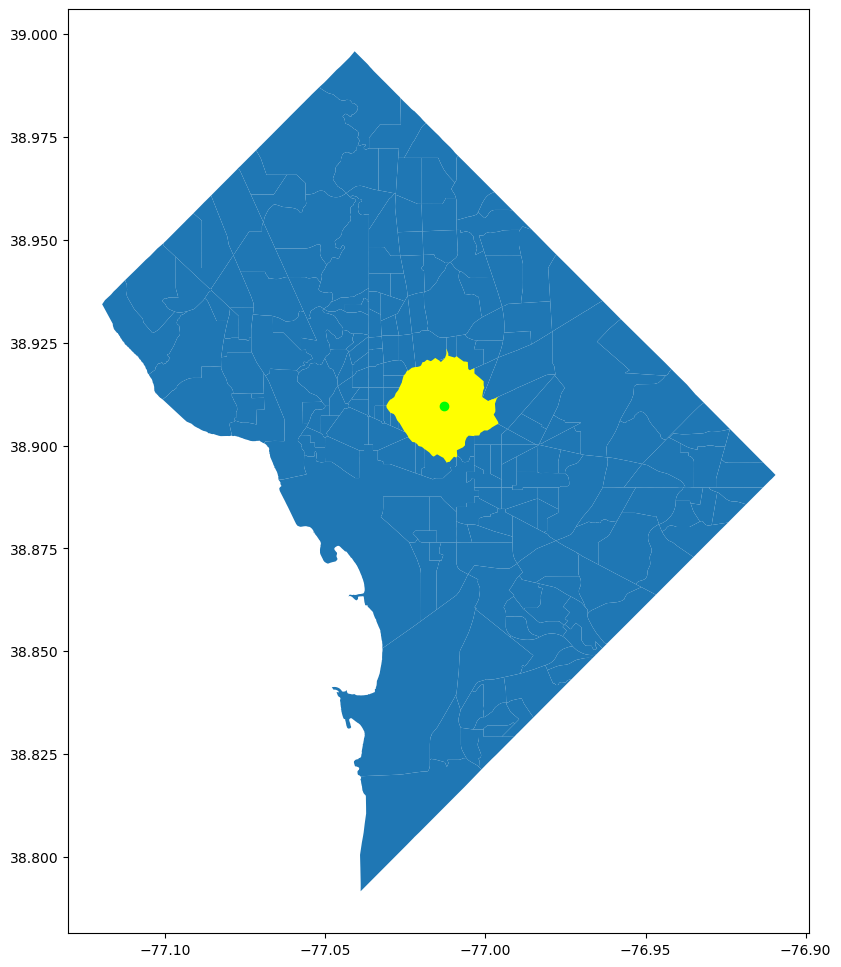

In [114]:
fig, ax = plt.subplots(figsize=(12,12))

dc_tracts.plot(ax=ax)
dc_iso.plot(ax=ax, color='yellow')
dc_geo.plot(ax=ax, color='lime')

In [115]:
datasets = DataStore("/srv/data/geonsap")

In [116]:
schools = datasets.nces(dataset="schools")
dc_schools = schools[schools["STFIP15"] == "11"]

/opt/tljh/user/lib/python3.10/site-packages/geosnap/_data.py:16: UserWarning: Streaming data from S3. Use `geosnap.io.store_nces()` to store the data locally for better performance
  warn(warning_msg)


In [117]:
dc_health = gpd.read_file('./data/dc_healthcare/Primary_Care_Facility.shp')
dc_stops = gpd.read_file('./data/dc_bus/Metro_Bus_Stops/Metro_Bus_Stops.shp')
dc_grocery= gpd.read_file('./data/dc_grocery/Grocery_Store_Locations.shp')
dc_parks = gpd.read_file('./data/dc_parks/Parks_and_Recreation_Areas.shp')
dc_pow = gpd.read_file('./data/dc_worship/Places_of_Worship.shp')

In [118]:
dc_iso.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
dc_schools = dc_schools.to_crs(4326)
dc_health = dc_health.to_crs(4326)
dc_stops = dc_stops.to_crs(4326)
dc_grocery = dc_grocery.to_crs(4326)
dc_parks = dc_parks.to_crs(4326)
dc_pow = dc_pow.to_crs(4326)

In [120]:
dc1 = dc_iso.overlay(dc_schools, how='intersection', keep_geom_type=False)
dc1

,distance,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,...,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15,year,geometry
0,1600,110000700370,Community Academy Amos 5,11,1400 First St NW,Washington,DC,20005,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,005,1516,POINT (-77.01300 38.90910)
1,1600,110000800497,Friendship PCS Armstrong,11,1400 1St NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,005,1516,POINT (-77.01219 38.90866)
2,1600,110001000224,Hospitality High School,11,1851 9th Street NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,001,1516,POINT (-77.02364 38.91535)
3,1600,110003000024,Seaton ES,11,1503 10th St NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,006,1516,POINT (-77.02489 38.91047)
4,1600,110003000070,Walker Jones EC,11,1125 New Jersey Ave NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,006,1516,POINT (-77.01319 38.90423)
5,1600,110003000079,Dunbar HS,11,101 N St NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,005,1516,POINT (-77.01284 38.90769)
6,1600,110003000103,Cleveland ES,11,1825 8th St NW,Washington,DC,20001,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,001,1516,POINT (-77.02269 38.91507)
7,1600,110003000203,Tuition Grant DCPS Non Public,11,1200 First St NE,Washington,DC,20002,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,006,1516,POINT (-77.00635 38.90607)
8,1600,110003000265,Residential Schools,11,1200 First St NE,Washington,DC,20002,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,006,1516,POINT (-77.00635 38.90607)
9,1600,110003000266,Lashawn DCPS Non Public,11,1200 First St NE,Washington,DC,20002,M,11,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,1198,N,006,1516,POINT (-77.00635 38.90607)


In [121]:
dc2 = dc_iso.overlay(dc_health, how='intersection', keep_geom_type=False)
dc2

,distance,DCGISPrima,DCGISPri_1,DCGISPri_2,DCGISPri_3,DCGISPri_4,DCGISPri_5,DCGISPri_6,DCGISPri_7,DCGISPri_8,...,DCGISPRI91,DCGISPRI92,DCGISPRI93,DCGISPRI94,DCGISPRI95,DCGISPRI96,DCGISPRI97,DCGISPRI98,DCGISPRI99,geometry
0,1600,Howard University Hospital Family Health Center,2139 GEORGIA AVENUE NW,WASHINGTON,DC,1,202-865-3250,None,None,None,...,None,None,None,None,None,None,None,None,Yes,POINT (-77.02162 38.91884)
1,1600,Bread for the City,1525 7TH STREET NW,WASHINGTON,DC,2,202-386-7020,None,None,None,...,None,None,None,Dental,None,None,Yes,None,Yes,POINT (-77.02163 38.91034)
2,1600,S.O.M.E (So Others Might Eat),60 O STREET NW,WASHINGTON,DC,5,202-797-8806,None,None,None,...,None,None,Yes,Opthalmology,None,None,None,None,Yes,POINT (-77.01110 38.90825)
3,1600,Planned Parenthood - Carol Whitehill Moses Center,1225 4TH STREET NE,WASHINGTON,DC,6,202-347-8500,None,None,None,...,None,None,None,None,None,None,None,None,Limited,POINT (-77.00026 38.90632)
4,1600,Providence Hospital's Perry Family Health Center,128 M STREET NW,WASHINGTON,DC,6,202-682-3840,None,None,None,...,None,None,None,None,None,None,Yes,None,Yes,POINT (-77.01335 38.90539)
5,1600,Unity - Patricia Handy Place,810 5TH STREET NW,WASHINGTON,DC,2,202-508-0500,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-77.01915 38.90033)
6,1600,Unity - Central Union Mission - Gales School,65 MASSACHUSETTS AVENUE NW,WASHINGTON,DC,6,202-508-0500,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-77.01108 38.89869)


In [122]:
dc3 = dc_iso.overlay(dc_stops, how='intersection', keep_geom_type=False)
dc3

,distance,EGIS_ID,REG_ID,BSTP_GEO_I,BSTP_OPS_T,BSTP_EFF_D,BSTP_TCD,AT_STR,ON_STR,BSTP_HDG,...,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SNOWPRIORI,BSTP_OPS_F,MSTN_ID,geometry
0,1600,1395300,1003839,21636,PRS,2015-12-13,REV,T ST NW,4TH ST NW,350,...,{825EA012-E9FB-4631-BDCE-749451E24820},JLAY,2024-01-19,JLAY,2024-01-19,55089,None,NON,None,POINT (-77.01723 38.91582)
1,1600,1308248,1001714,6960,PRS,1964-08-15,UNK,V ST NE,N CAPITOL ST NE,2,...,{EC519982-9613-4393-96D3-FE2963BAEAFE},JLAY,2024-01-19,JLAY,2024-01-19,55284,None,NON,None,POINT (-77.00884 38.91839)
2,1600,1308242,1001579,6699,PRS,1959-10-12,REV,RANDOLPH PL,N CAPITOL ST NE,360,...,{DFA67254-C194-4D4C-8450-C53A69728A4D},JLAY,2024-01-19,JLAY,2024-01-19,55349,YES,NON,None,POINT (-77.00893 38.91319)
3,1600,1308233,1001206,6005,PRS,1958-09-07,REV,K ST NW,N CAPITOL ST NW,181,...,{23352328-C9AC-48B3-832E-07B072CB588F},JLAY,2024-01-19,JLAY,2024-01-19,55350,YES,NON,None,POINT (-77.00919 38.90214)
4,1600,1308009,1001152,5869,PRS,1977-07-05,REV,N CAPITOL ST NW,H ST NW,270,...,{00DAB7A6-7EA3-4EFF-A649-3CE0F75516DE},JLAY,2024-01-19,JLAY,2024-01-19,55356,YES,NON,None,POINT (-77.00974 38.90032)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1600,1307996,1001135,5846,PRS,1977-07-05,REV,N CAPITOL ST NW,H ST NW,91,...,{13F8B2FF-BE86-4116-8111-B2EACDD76821},JLAY,2024-01-19,JLAY,2024-01-19,64511,None,NON,None,POINT (-77.00941 38.90014)
184,1600,1307971,1001356,6294,PRS,1962-02-15,REV,5TH ST NE,FLORIDA AVE NE,118,...,{DC1FEE79-62BF-4F07-89DF-FCA69137C5B9},JLAY,2024-01-19,JLAY,2024-01-19,64534,YES,NON,None,POINT (-76.99968 38.90672)
185,1600,1307922,1000999,5532,PRS,1901-01-01,REV,NEW JERSEY AVE NW,E ST NW,90,...,{73FBDE70-9D7D-487B-B615-2E9955EAA0DE},JLAY,2024-01-19,JLAY,2024-01-19,64565,None,NON,None,POINT (-77.01164 38.89606)
186,1600,1307224,1001149,5865,PRS,1901-01-01,REV,H ST NW,5TH ST NW,358,...,{72BCA4C8-D12E-40DF-B8D6-BB7076F7C11A},JLAY,2024-01-19,JLAY,2024-01-19,64611,None,NON,None,POINT (-77.01883 38.90021)


In [123]:
dc4 = dc_iso.overlay(dc_grocery, how='intersection', keep_geom_type=False)
dc4

,distance,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,...,YCOORD,MAR_ID,OBJECTID,SE_ANNO_CA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,1600,Giant,1400 7TH STREET NW,20001,2022380180,Ward 2,0398 0836,O Street Market,No,No,...,137878.29,304153,685,None,{3B7BC6D4-B9C8-47C2-A6E3-3ABC4B866128},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.02213 38.90877)
1,1600,Trader Joe's,1240 4TH STREET NE,20002,2026081023,Ward 5,3587 0820,None,No,No,...,137746.72,285974,686,None,{FA6F18F0-D92C-46A8-B126-8C41D9FDB874},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.00057 38.90759)
2,1600,Harris Teeter,1201 1ST STREET NE,20002,2029861415,Ward 6,0711 0816,None,No,No,...,137573.06,303728,688,None,{8CDC5267-E6E1-48AF-AFEA-78C495698D3E},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.00549 38.90602)
3,1600,Streets Market,51 M STREET NE,20002,2028981314,Ward 6,0673 0035,None,None,None,...,137510.85,314143,689,None,{D3E48F1B-5213-4D23-9936-A3D4134F935E},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.00727 38.90546)
4,1600,Walmart Supercenter,99 H STREET NW,20001,2027192110,Ward 6,0623 0836,H Street,No,No,...,136949.39,310062,697,None,{64362A25-E4DC-498A-99E0-AFD5F5458CD1},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.01199 38.90040)
5,1600,Capitol Super Market,1231 11TH STREET NW,20001,2022891336,Ward 2,0340 0824,None,No,No,...,137659.43,239341,716,None,{0613191B-5619-4A20-83D7-E7FEA9AF28FC},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.02669 38.90680)
6,1600,Safeway,490 L STREET NW,20001,2027192435,Ward 6,0515 0158,Mt. Vernon Square,No,No,...,137292.77,304767,717,None,{009CF7A2-1951-4C57-8BB0-903A0D541736},JLAY,2022-09-28,GHATCHARD,2023-05-17,POINT (-77.01835 38.90350)


In [124]:
dc5 = dc_iso.overlay(dc_parks, how='intersection', keep_geom_type=False)
dc5

,distance,OBJECTID,NAME,ADDRESS,USE_TYPE,PROPID,ACTIVE,DIAMOND60,DIAMOND90,BBCOURT,...,SSL,DATE_ACQUI,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1600,117,K C Lewis,"Bryant and W Sts., 4th St., NW",PARK,DPR_0705,Y,1.0,0.0,1.0,...,RES 07050000,1972-12-14,{A5FDF8BB-F17C-4833-BBD3-E3C7ED36EEFC},None,None,None,None,0,0,"POLYGON ((-77.01670 38.91999, -77.01640 38.920..."
1,1600,123,The Park at LeDroit,4th Street NW and V Street NW,SMALL PARK,DPR_0061,Y,NaN,NaN,NaN,...,3082 0826,None,{4B76DAC2-27D1-4F2F-B725-EBD0E6E3280A},None,None,None,None,0,0,"POLYGON ((-77.01563 38.91761, -77.01564 38.917..."
2,1600,127,Anna J. Cooper Circle,"T and 3rd Streets, NW",CIRCLE,DPR_0311,Y,NaN,NaN,NaN,...,RES 03110000,2004-01-01,{8E560216-653E-40DF-81C6-497629B87CCE},None,None,None,None,0,0,"POLYGON ((-77.01575 38.91579, -77.01577 38.915..."
3,1600,129,Harry Thomas,"Lincoln Rd. and 2nd St., to R and T Sts., NE",REC CENTER GROUNDS,DPR_0464,Y,0.0,1.0,1.0,...,RES 04640000,None,{2A248F8E-D274-41E0-8EE2-7E6ED360E9EE},None,None,None,None,0,0,"POLYGON ((-77.00665 38.91520, -77.00665 38.915..."
4,1600,130,Westminster Playground,"907 Westminster St., NW",PARK,DPR_0043,Y,NaN,NaN,NaN,...,Multiple Lots,None,{F075ABCD-9D03-4701-8692-1908B678E7CC},None,None,None,None,0,0,"POLYGON ((-77.02479 38.91493, -77.02479 38.915..."
5,1600,137,10th and French Street Park,10th & French St. NW,SMALL PARK,DPR_0022,Y,NaN,NaN,NaN,...,Multiple Lots,None,{261EBA85-699E-453E-BC99-F96857F7E32C},None,None,None,None,0,0,"POLYGON ((-77.02566 38.91351, -77.02565 38.913..."
6,1600,139,Triangle Park RES 0166,"Vermont Ave. & 12th St., north of R St., NW",SMALL PARK,DPR_0166,Y,NaN,NaN,NaN,...,RES 01660000,None,{4A4E1B58-8269-43D4-B0A2-5F5468512A7E},None,None,None,None,0,0,"POLYGON ((-77.02795 38.91278, -77.02799 38.912..."
7,1600,140,Triangle Park RES 0159,"Rhode Island Ave.,6th St.,R St.,NW",TRIANGLE,DPR_0159,Y,NaN,NaN,NaN,...,0444N 0800,None,{A0F3D35D-3CFC-4593-91C1-0A190F8E35B0},None,None,None,None,0,0,"POLYGON ((-77.02007 38.91283, -77.02006 38.912..."
8,1600,141,Florida Avenue Playground,"First Street and Florida Avenue, NW",PARK,DPR_0011,Y,NaN,NaN,1.0,...,0551 0232,None,{47EB578C-16C9-428A-BC40-61A4B0D9C083},None,None,None,None,0,0,"POLYGON ((-77.01232 38.91198, -77.01354 38.911..."
9,1600,143,Shaw,"Rhode Island Ave. and 11th St., NW",REC CENTER GROUNDS,DPR_0155,Y,1.0,0.0,2.0,...,0336 0828,1972-12-17,{1ABCB361-2F4F-44B3-9277-8EEA53FB217B},None,None,None,None,0,0,"POLYGON ((-77.02599 38.91157, -77.02599 38.911..."


In [125]:
dc7 = dc_iso.overlay(dc_pow, how='intersection', keep_geom_type=False)
dc7

,distance,OBJECTID,GIS_ID,NAME,WEB_URL,RELIGION,ADDRESS,XCOORD,YCOORD,PLACE_OF_W,IS_PLACE_O,MAR_ID,SE_ANNO_CA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,1600,299,PlacesofWorshipPt_27,HIGHWAY CHRISTIAN CHR-CHRIST,None,CHRISTIAN,432 W ST NW,398378.96,139016.00,CHURCHES,1,NaN,None,{42BFCA5D-9814-46FC-8A04-EFEBD4F7546E},None,None,None,None,POINT (-77.01869 38.91902)
1,1600,301,PlacesofWorshipPt_38,TRUE GRACE CHURCH OF JESUS,None,CHRISTIAN,205 V ST NW,398676.67,139004.73,CHURCHES,1,NaN,None,{968B80BB-A59C-4302-8E25-3C38DA0DC92C},None,None,None,None,POINT (-77.01526 38.91892)
2,1600,308,PlacesofWorshipPt_35,SONS-DAUGHTERS IN CHRIST A M E,None,CHRISTIAN,345 ELM ST NW,398486.84,138847.60,CHURCHES,1,NaN,None,{D49302A2-45F3-4169-B7CA-EE8375A6A8FD},None,None,None,None,POINT (-77.01745 38.91750)
3,1600,309,PlacesofWorshipPt_68,ALL NATIONS BAPTIST CHURCH,ALLNATIONSBAPTISTCHURCH.COM,CHRISTIAN,2001 N CAPITOL ST NE,399240.77,138822.99,CHURCHES,1,NaN,None,{35F94425-761A-463D-918A-5676636D7A16},None,None,None,None,POINT (-77.00876 38.91728)
4,1600,311,PlacesofWorshipPt_704,Franklin P Nash United Methodist,None,CHRISTIAN,2001 LINCOLN ROAD NE,399394.02,138815.24,CHURCHES,1,286579.0,None,{2562755B-B39C-4334-9730-E11EDC8FC3CC},None,None,None,None,POINT (-77.00699 38.91721)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1600,473,PlacesofWorshipPt_50,MT CARMEL BAPTIST CHURCH,THEMCBC.ORG,CHRISTIAN,901 3RD ST NW,398714.59,137095.19,CHURCHES,1,NaN,None,{20EFB17B-1201-42FA-A351-585ED56F48CF},None,None,None,None,POINT (-77.01482 38.90172)
63,1600,474,PlacesofWorshipPt_21,ST ALOYSIUS PARISH,STALSCHURCHDC.ORG,CHRISTIAN,19 EYE ST NW,399162.07,137078.12,CHURCHES,1,NaN,None,{6BCF9A25-3020-4036-8465-7061FAE626B4},None,None,None,None,POINT (-77.00966 38.90156)
64,1600,487,PlacesofWorshipPt_43,SECOND BAPTIST CHURCH,SECONDBAPTISTCHURCHDC.ORG,CHRISTIAN,816 3RD ST NW,398652.13,136991.39,CHURCHES,1,NaN,None,{782773AF-CA22-4598-A1ED-961C7DB7597C},None,None,None,None,POINT (-77.01554 38.90078)
65,1600,492,PlacesofWorshipPt_42,TEMPLE OF CUN YUM,None,CHRISTIAN,805 6TH ST NW,398291.73,136912.70,CHURCHES,1,NaN,None,{4C718770-A048-48FC-82AE-19C5BB7C103E},None,None,None,None,POINT (-77.01970 38.90007)


In [126]:
dc_service_gdf = pd.concat([dc1, dc2, dc3, dc4, dc5, dc7], ignore_index=True)
unioned_geometry = dc_service_gdf.unary_union

In [127]:
dc_service_gdf = gpd.GeoDataFrame(geometry=[unioned_geometry])

In [128]:
for num in [dc1, dc2, dc3, dc4, dc5, dc7]:
    dc_service_gdf = pd.concat(
        [dc_service_gdf, num.drop(columns='geometry')], axis=1
    )

<Axes: >

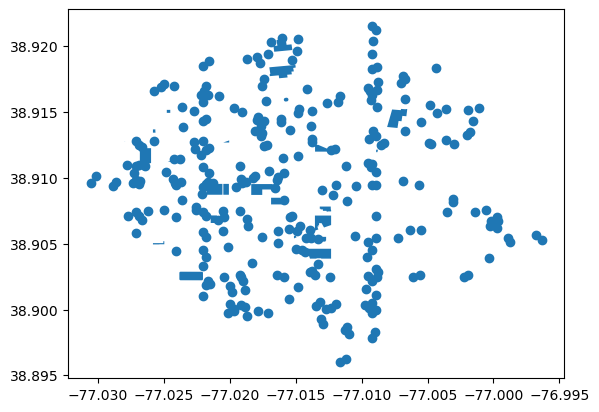

In [129]:
dc_service_gdf.plot()

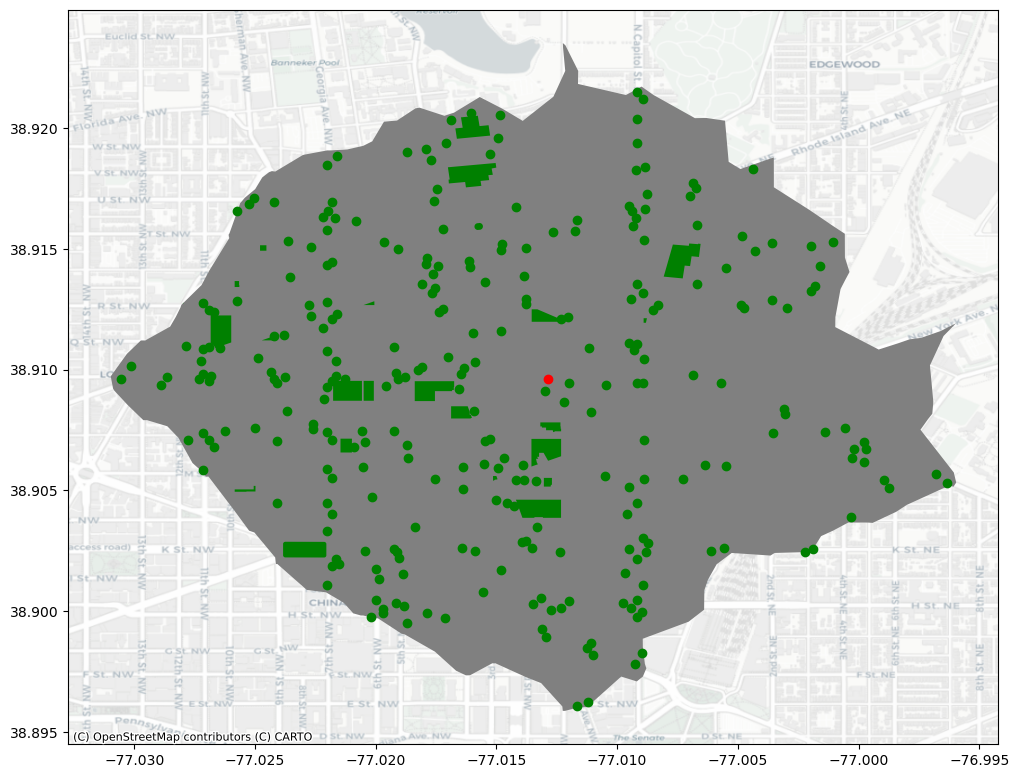

In [130]:
fig, ax = plt.subplots(figsize=(12,12))

dc_iso.plot(ax=ax, color='grey')
dc_service_gdf.plot(ax=ax, color='green')
dc_geo.plot(ax=ax, color='red')
cx.add_basemap(ax=ax, crs=dc_iso.crs.to_string(), source=cx.providers.CartoDB.Positron)